In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('HR analytics.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
print(f'Shape:{df.shape}')

Shape:(1470, 35)


In [6]:
print(f'NaNs:{df.isna().sum()}')
print(f'Columns:{df.columns.tolist()}')
print(f'Uniques:{df.nunique()}')

NaNs:Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
Years

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

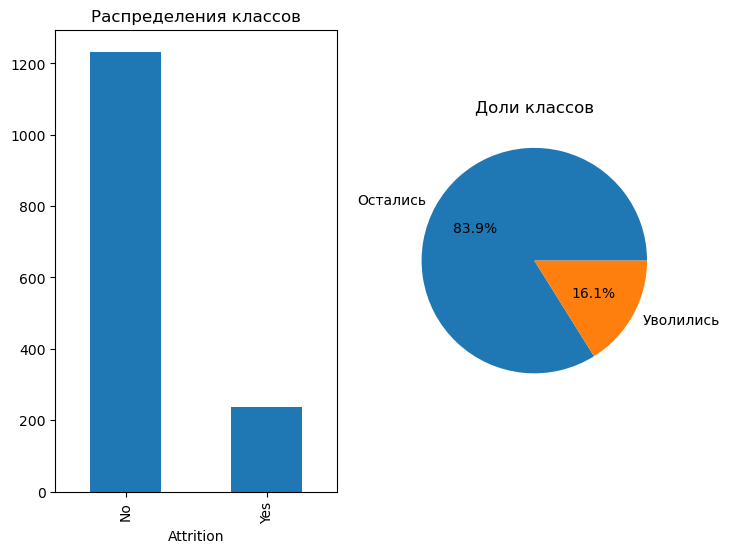

In [4]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
df['Attrition'].value_counts().plot(kind='bar')
plt.title('Распределения классов')

plt.subplot(1, 2, 2)
plt.pie(df['Attrition'].value_counts(), labels=['Остались', 'Уволились'], autopct='%1.1f%%')
plt.title('Доли классов')
plt.show()

In [24]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [5]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


In [7]:
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=3, labels=['Low', 'Medium', 'High'])
pd.crosstab(df['IncomeGroup'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
IncomeGroup,,
Low,81.679389,18.320611
Medium,85.767790,14.232210
High,95.483871,4.516129


In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
print(df['Attrition'].unique())
print(df['BusinessTravel'].unique())
print(df['Department'].unique())
print(df['EducationField'].unique())
print(df['Gender'].unique())
print(df['JobRole'].unique())
print(df['MaritalStatus'].unique())
print(df['Over18'].unique())
print(df['OverTime'].unique())

['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']


In [3]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)
df['Over18'] = np.where(df['Over18'] == 'Y', 1, 0)
df['OverTime'] = np.where(df['OverTime'] == 'Yes', 1, 0)
df_encoded = df.copy()
le = LabelEncoder()
selection = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
for col in selection:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df_encoded.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

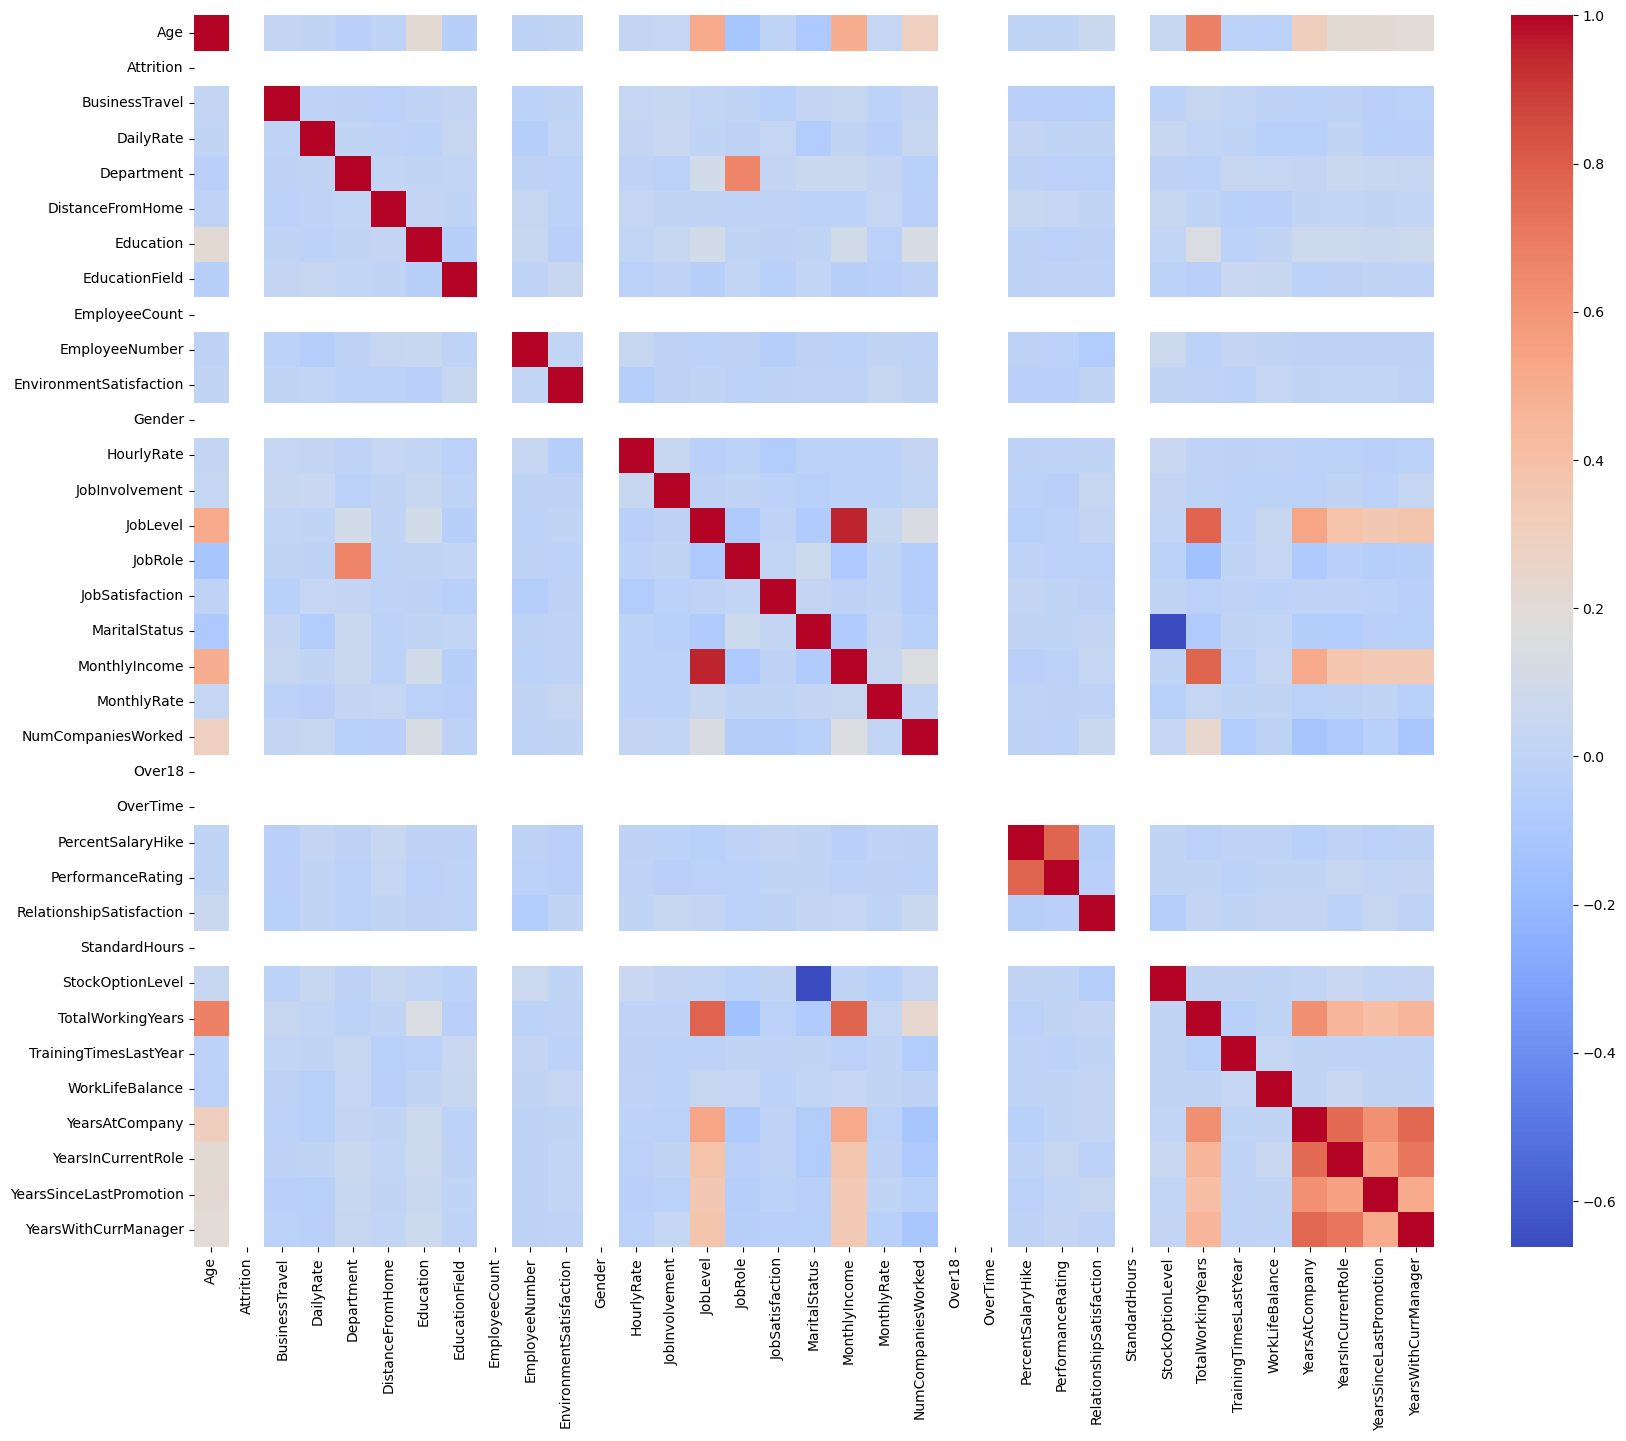

In [28]:
cm = df_encoded.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=False, cmap='coolwarm')
plt.show()

In [7]:
correlation_with_attrition = df_encoded.corr()['Attrition'].sort_values(ascending=False)
print("Корреляция с Attrition:")
print(correlation_with_attrition)


Корреляция с Attrition:
Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrM

In [4]:
cols_for_model = ['OverTime', 'MaritalStatus', 'DistanceFromHome', 'Department', 'MonthlyIncome', 'JobSatisfaction', 'YearsAtCompany', 'Age']
x = df_encoded[cols_for_model]
y = df_encoded['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)
lr = LogisticRegression(max_iter = 10000)
lr_model = lr.fit(x_train, y_train)
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train, y_train)
gbc = GradientBoostingClassifier()
gbc_model = gbc.fit(x_train, y_train)

In [22]:
print(f'LR accuracy: {lr_model.score(x_test, y_test) * 100}')
print(f'GBC accuracy: {gbc_model.score(x_test, y_test) * 100}')
print(f'RFC accuracy: {rfc_model.score(x_test, y_test) * 100}')

LR accuracy: 86.39455782312925
GBC accuracy: 86.73469387755102
RFC accuracy: 85.03401360544217


In [7]:
y_predlr = lr_model.predict(x_test)
y_predgbc = gbc_model.predict(x_test)
y_predrfc = rfc_model.predict(x_test)

predictions = [y_predlr, y_predgbc, y_predrfc]

for i, y_pred in enumerate(predictions):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model {i+1}:")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 score: {f1:.3f}\n")

Model 1:
Precision: 0.455
Recall: 0.128
F1 score: 0.200

Model 2:
Precision: 0.500
Recall: 0.205
F1 score: 0.291

Model 3:
Precision: 0.333
Recall: 0.103
F1 score: 0.157



<Axes: title={'center': 'Confusion matrix for LR:'}>

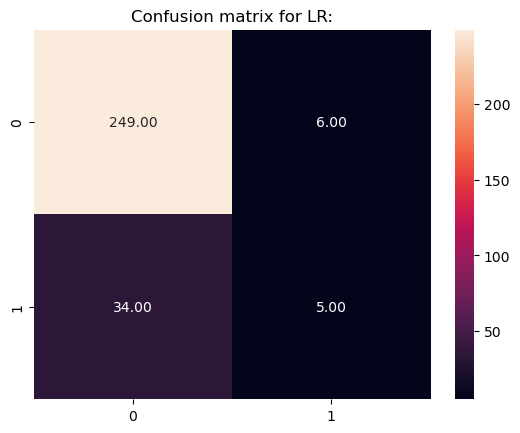

In [8]:
cm_lr = confusion_matrix(y_test, y_predlr)
cm_gbc = confusion_matrix(y_test, y_predgbc)
cm_rfc = confusion_matrix(y_test, y_predrfc)
plt.title('Confusion matrix for LR:')
sns.heatmap(cm_lr, annot=True, fmt='.2f')

<Axes: title={'center': 'Confusion matrix for GBC'}>

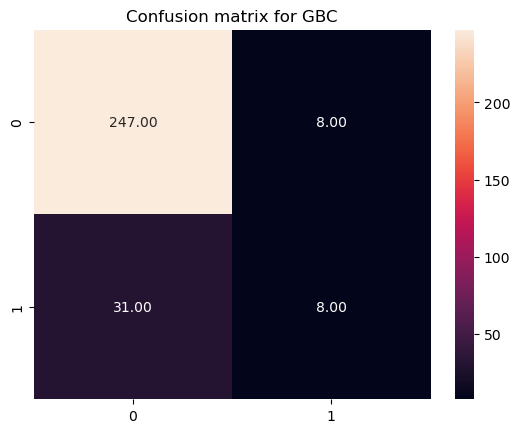

In [9]:
plt.title('Confusion matrix for GBC')
sns.heatmap(cm_gbc, annot=True, fmt='.2f')

<Axes: title={'center': 'Confusion matrix for RFC'}>

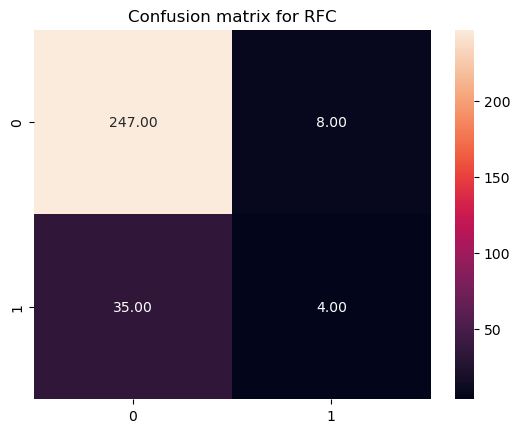

In [11]:
plt.title('Confusion matrix for RFC')
sns.heatmap(cm_rfc, annot=True, fmt='.2f')

In [ ]:
print("Распределение в y_train:")
print(y_train.value_counts(normalize=True))

print("Распределение в y_test:")
print(y_test.value_counts(normalize=True))

In [15]:
feature_importancegbc = pd.DataFrame({
    'feature': x.columns,
    'importance': gbc_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importances GBC")
print(feature_importance)


Feature Importances GBC
            feature  importance
4     MonthlyIncome    0.249725
7               Age    0.170349
2  DistanceFromHome    0.149284
6    YearsAtCompany    0.143401
0          OverTime    0.090396
5   JobSatisfaction    0.076610
1     MaritalStatus    0.072144
3        Department    0.048091


In [16]:
feature_importancerfc = pd.DataFrame({
    'feature': x.columns,
    'importance': rfc_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importances RFC")
print(feature_importance)


Feature Importances RFC
            feature  importance
4     MonthlyIncome    0.249725
7               Age    0.170349
2  DistanceFromHome    0.149284
6    YearsAtCompany    0.143401
0          OverTime    0.090396
5   JobSatisfaction    0.076610
1     MaritalStatus    0.072144
3        Department    0.048091


In [18]:
feature_importancelr = pd.DataFrame({
    'feature': x.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nFeature Importances LR")
print(feature_importance)


Feature Importances LR
            feature  importance
4     MonthlyIncome    0.249725
7               Age    0.170349
2  DistanceFromHome    0.149284
6    YearsAtCompany    0.143401
0          OverTime    0.090396
5   JobSatisfaction    0.076610
1     MaritalStatus    0.072144
3        Department    0.048091
